In [1]:
# data cleaning
# EDA
# model selection
# model predict
# streamlit

In [2]:
'''data cleaning
   $ lower_case{n}
   $ removing speacial chars{d}
   $ word_tokenize{d}
   $ stop_words and punctuations{d}
   $ stemming{d}'''

'data cleaning\n   $ lower_case{n}\n   $ removing speacial chars{d}\n   $ word_tokenize{d}\n   $ stop_words and punctuations{d}\n   $ stemming{d}'

In [3]:
import pandas as pd
email = pd.read_csv('spam.csv')

In [4]:
email.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### DATA CLEANING

In [5]:
def func(n):
    if n == 'ham':
        return 1
    elif n == 'spam':
        return 0
email['category'] = email['Category'].apply(func)

In [6]:
email['category'].value_counts()

1    4825
0     747
Name: category, dtype: int64

In [7]:
email.describe()

,category
count,5572.000000
mean,0.865937
std,0.340751
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
msg = list(email['Message'])

In [9]:
lst = []
for i in msg:
    lst.append(i.split('\n'))

In [10]:
import nltk
from nltk.tokenize import word_tokenize
msgs = []
for i in lst:
    for j in i:
        msgs.append(word_tokenize(j))

In [11]:
# msgs contains word tokenized
import string
from nltk.corpus import stopwords

punct = list(string.punctuation)
stops = stopwords.words('english')

In [12]:
# removing spc chars
spc = []
for i in msgs:
    for j in i:
        if not j.isalnum():
            i.remove(j)
            spc.append(j)

In [13]:
st = []
for i in msgs:
    for j in i:
        if j in stops:
            i.remove(j)
            st.append(j)

In [14]:
# stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
for i in msgs:
    for j,k in enumerate(i):
        i[j] = ps.stem(k) 
        

In [15]:
print(msg[9])
print(' '.join(msgs[9]))

Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030
had mobil 11 month more u r entitl updat the latest colour mobil camera free call the mobil updat co free 08002986030


([<matplotlib.patches.Wedge at 0x1e2e9648760>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'Spam'),
  Text(1.0038714771419537, -0.44971330576360763, 'Ham')])

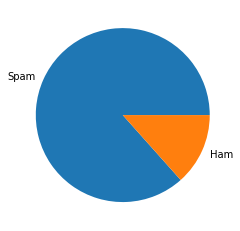

In [16]:
# plot spam vs ham pie chart  (PART OF EDA)
from matplotlib import pyplot as plt
plot = email['category'].value_counts()
plt.pie(plot,labels = ['Spam', 'Ham'])


In [17]:
lst = []
for i in msgs:
    lst.append(' '.join(i))

In [18]:
v = pd.Series(lst)

In [19]:
email['my_texed'] = v

In [20]:
email

,Category,Message,category,my_texed
0,ham,"Go until jurong point, crazy.. Available only ...",1,go jurong point crazi avail in bugi n great wo...
1,ham,Ok lar... Joking wif u oni...,1,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,nah i think goe usf live around though
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0,huh lei
5568,ham,Will ü b going to esplanade fr home?,1,remind from o2 to get pound free call credit d...
5569,ham,"Pity, * was in mood for that. So...any other s...",1,thi 2nd time tri 2 contact u have won the poun...
5570,ham,The guy did some bitching but I acted like i'd...,1,will ü b go esplanad fr home


In [21]:
#email.to_csv('Emails.csv', encoding='utf-8')

In [22]:
my_data = pd.read_csv('MYEmails.csv')

In [23]:
my_data

,Unnamed: 0,Category,Message,category,my_texed
0,0,ham,"Go until jurong point, crazy.. Available only ...",1,go jurong point crazi avail in bugi n great wo...
1,1,ham,Ok lar... Joking wif u oni...,1,ok lar joke wif u oni
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,free entri 2 wkli comp win fa cup final tkt 21...
3,3,ham,U dun say so early hor... U c already then say...,1,u dun say earli hor u c alreadi say
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",1,nah i think goe usf live around though
...,...,...,...,...,...
5563,5565,ham,Huh y lei...,1,huh lei
5564,5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,0,remind from o2 to get pound free call credit d...
5565,5567,spam,This is the 2nd time we have tried 2 contact u...,0,thi 2nd time tri 2 contact u have won the poun...
5566,5568,ham,Will ü b going to esplanade fr home?,1,will ü b go esplanad fr home


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
X = my_data['my_texed'] 
y = my_data['category'] 

In [26]:
vector = TfidfVectorizer(max_features=3500)
#X.isnull.sum()
# my_data[my_data['my_texed'].isnull()]
X = vector.fit_transform(X)

In [27]:
model = SVC(kernel = 'linear')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [29]:
#from sklearn.naive_bayes import BernoulliNB
#model = BernoulliNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
model.fit(X_train, y_train)

SVC(kernel='linear')

In [30]:
model.score(X_test, y_test)*100

98.92280071813285

In [31]:
from sklearn.metrics import precision_score
y_pred = model.predict(X_test)
precision_score(y_test, y_pred)*100

98.7878787878788

In [32]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)*100

1.0771992818671454

In [33]:
you = input('ENTER YOUR EMAIL : ')
waste = []
youlist = word_tokenize(you)
for i in youlist:
    if i in stops or i in punct:
        youlist.remove(i)
        waste.append(i)
for i,j in enumerate(youlist):
    youlist[i] = ps.stem(j)
    
final_msg = [' '.join(youlist)]

ENTER YOUR EMAIL : is this your laptop


In [34]:
Final_MSG = vector.transform(final_msg)

In [35]:
Predict = model.predict(Final_MSG)

In [36]:
def output():
    if Predict == 1:
        return 'HAM'
    else:
        return 'SPAM'
output()

'HAM'

In [37]:
# import pickle
# with open('EmailModel.pkl', 'wb') as pic:
#     pickle.dump(model, pic)
# with open('TfidfEmail.pkl', 'wb') as vec:
#     pickle.dump(vector, vec)